# LAB 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import numpy.random as rnd
import networkx as nx
%matplotlib inline
from scipy import stats

## In the first task i will generate two graphs 1-st graph with $n*p=1$ and second with $n*p\rightarrow\infty$ 
p cannot be more than one so for 1-st example i will generate (1000,0.001) graph and for second case (10^5,0.1).

In [2]:
graph1=nx.erdos_renyi_graph(1000,0.001)
graph2=nx.erdos_renyi_graph(1000,0.1)

(array([ 357.,  358.,  190.,   67.,   28.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 5 Patch objects>)

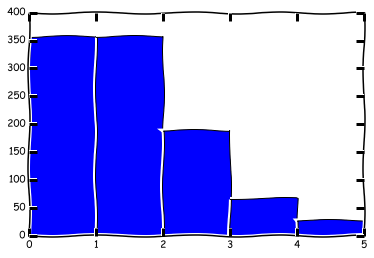

In [4]:
plt.hist(graph1.degree().values(),bins=5)

(array([   4.,   12.,   65.,  209.,  281.,  246.,  140.,   36.,    7.]),
 array([  65.        ,   72.33333333,   79.66666667,   87.        ,
          94.33333333,  101.66666667,  109.        ,  116.33333333,
         123.66666667,  131.        ]),
 <a list of 9 Patch objects>)

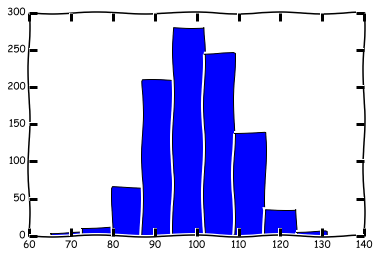

In [11]:
plt.hist(graph2.degree().values(),bins=9)

## On the plots we can already see that degree distribution of the first graph is look like poisson and the degree distribution of second graph looks like normal. To test if it is true lets try to estimate the parameters using maximum liklehood approach. We can use this approach because we assume that our variables are iid(independent and identically-distributed). For the first graph we need to maximize function $f(x)=\frac{e^{-\lambda n}\lambda^{\sum{x_i}}}{\prod {x_i}}$. Maximizing this function for $\lambda$ variable we will get that $\hat\lambda=\bar{x}$ so for our distribution it will be: 0.972

In [6]:
print "lambda->", np.mean(graph1.degree().values())

lambda-> 1.056


## The same idea is used to evaluate parameters for the gauss distribution from the second graph.  The maximum liklehood function that we maximize will look like this $L=(2\Pi\sigma)^{-n/2}e^{-\frac{1}{2\sigma}\sum(x_i-\mu)^2}$ maximizing this function using $\sigma$ and $\mu$ we will get that $\hat\sigma=1/n\sum(x_i-\hat\mu)^2$ and $\hat\mu=\bar x$ 

In [7]:
print "mu->", np.mean(graph2.degree().values())
print "sigma->", np.var(graph2.degree().values())

mu-> 99.926
sigma-> 92.104524


## Now we can use kolmogorov-smirnov test to check if this vectors has this distribution.

In [8]:
r = stats.poisson.rvs(np.mean(graph1.degree().values()), size=1000)
stats.ks_2samp(sorted(r),sorted(graph1.degree().values()))

Ks_2sampResult(statistic=0.012000000000000011, pvalue=0.99999959361372215)

In [9]:
z=(list(sorted(graph2.degree().values()))-np.mean(graph2.degree().values()))/np.sqrt(np.var(graph2.degree().values()))
stats.kstest(z, 'norm')

KstestResult(statistic=0.045472284106110539, pvalue=0.031004482488210749)

### From this results we can see that 1-st vector has poisson distribution with our parameter with greate probability, but there is the problem with the second vector. May be $p*n$ was not still large enough.

## there is two cases when $n\to \infty$ first is when $n*p=\lambda $ is fixed for example $p=1/n$ in this case we will show that it will be poission distribution. 1-st of all we know that each node degree has binominal distribution $P\{k_i = l\} = C_{n-1}^{l} p^{l}(1-p)^{n-1-l}$ $n\cdot p = \langle k\rangle < \infty $
for $n \rightarrow \infty$ from Stirling's formulae:
$$
C_{n-1}^{l} p^{l}(1-p)^{n-1-l} = \frac1{l!}\sqrt{\frac{2\pi (n-1)}{2\pi(n-1-l)}} ((n-1)p)^{l} ((1 + \frac{l}{n-1-l})(1-p))^{n-1-l}e^{-l} =
$$
$$
\frac1{l!}\sqrt{1 + \frac{l}{(n-1-l)} }((n-1)p)^{l} (1 + \frac{l}{n-1-l})^{\frac{n-1-l}{l}l} e^{(n-1-l)log(1-p)  - l} \rightarrow\frac{\langle k\rangle^{l} e^{-\langle k\rangle}}{l!}
$$


$\sqrt{1+\frac{l}{n-1-l}} \rightarrow 1$ $((n-1)p)^{l} \rightarrow \langle k \rangle ^{l}$ $(1 + \frac{l}{n-1-l})^{\frac{n-1-l}{l}l} \rightarrow e^{l}$ $e^{(n-1-l)log(p)} = e^{(n-1-l) (-p +o(p))} \rightarrow e^{-\langle k\rangle}$
so we reach poisson distribution. 

### In our case we do not need $p$ as $np\to \infty$ so we will just say that $\lambda=n$ not $\lambda=np$ Let $X_n \sim Poisson(n)$ for $n=1,2,3...$ pmf for $X_n$ 
### $F=\frac{n^xe^{-n}}{x!}$ the moment gererating function(mgf) of $X_n$ is $Ee^{tX_n}=e^{n(e^t-1)}$ the limit of this for $n\to \infty$ will be $\infty$. Let' now look at standartized Poisson random variable $\frac{X_n-n}{\sqrt{n}}$ with mgf $\lim\limits_{n\rightarrow \inf}E[exp(t\frac{X_n-n}{\sqrt{n}})]=\lim\limits_{n\rightarrow \inf}exp(-t\sqrt{n})E[exp(\frac{tX_n}{\sqrt{n}})]=\lim\limits_{n\rightarrow \inf}exp(-t\sqrt{n})exp(n(e^{\frac{t}{\sqrt{n}}}-1)=\lim\limits_{n\rightarrow \inf}exp(-t\sqrt{n}+n(tn^{-1/2}+t^2n^{-1}/2+t^3n^{-1.5}/6+...))=\lim\limits_{n\rightarrow \inf}exp(\frac{t^2}{2}+\frac{t^3}{n^{0.5}6}+...)=exp(\frac{t^2}{2})$

## This can be recognized as the moment generating function of a standard normal random variable with $mean=n$ and $var=n$